In [ ]:
# SUPERVISED MACHINE LEARNING
# REGRESSION  - Simple Linear Regression
# When using regression, make sure independent & dependent variable are NUMERICAL
# Independent : hours studied , Dependent : Test Grade

# Import All Necessray Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Stage 2 : EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [ ]:
# Stage 3 : Data Preparation
# handle missing values
# remove duplicates records
# convert non-numerical features into numerical
# normalization
# select independent and dependent variable

In [ ]:
# handle missing values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [ ]:
# remove duplicates records
data.duplicated().sum()

np.int64(0)

In [ ]:
# convert non-numerical features into numerical
# categorical data --> yes no , true false , fail pass , correct wrong  --> 0 1
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [ ]:
lb.fit_transform(['fail','pass'])
# before using this code, need to test it first whether it can detect the positive and negative
# exp: if it is shows fail as 1, and pass as 0, then we cannot use this Label Binarizer

array([[0],
       [1]])

In [ ]:
data.Status = lb.fit_transform(data.Status)
# If we want to update the previous record, then write like this
# Run this cell ONLY ONCE because we update the previous record

# data[''] = lb.fit_transform(data.Status) --> if want create a new column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [ ]:
 Xnorm = (4500-1800) / (100000 - 1800)
Xnorm

0.0274949083503055

In [ ]:
# d.) normalization
# For machine learning, every dataset does not require normalization. It is
# required only when features have different ranges.

# The goal of normalization is to change the values of numeric
# columns in the dataset to a common scale.

# when you normalize your data you're not changing its meaning --> you're just changing
# its scale so that the model can learn efficiently

# after normalization features are on comparable scale

# 2000 <---> 0.002036659877800407
# model trains on 0.002 instead of 2000

'''
                      example dataset where features have a different range
  age       income
  18        2000        0.002036659877800407
  19        4500        0.0274949083503055
  20        1800
  21        100000
  22         50000
  23         12000
  24         80000


  min = 1800
  max = 100000
  x   = 2000

  Xnorm = (X-Xmin) / (Xmax - Xmin)

  Xnorm = (2000-1800) / (100000-1800)
  Xnorm = 0.002036659877800407


  Xnorm = (4500-1800) / (100000-1800)
  Xnorm =  0.0274949083503055

'''


#vals = data.Test_Grade.values
#print(vals)

#nrmlz1 = pp.normalize([vals])
#print(nrmlz1)

#nrmlz2 = pp.MinMaxScaler().fit_transform([vals])
#print(nrmlz2)
print()

In [ ]:
# select independent and dependent variable

# X --> independent variable
# scikit-learn expects X to be 2D even if you have 1 feature
# reshaping is required when we dealing with 1 independent variable ONLY

# dependent variable needs to be 1D only , independent variable need to be in 2D

# exp : predict house price based on the number of rooms, the location factor, etc,
# then we dont need to reshape

X = data.Hours_Studied.values
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Y --> dependent variable
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Stage 4 : Model Development [ Apply A Suitable ML Algo On Dataset]

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
# Using Pickle
import pickle
pickle.dump(lin_reg,open('simple_reg.pkl','wb'))

In [ ]:
# Stage 5 : Model Evaluation
data['predicted_values'] = lin_reg.predict(X)    # 2 3 4 5 6 7 8 9 10

In [ ]:
data[['Hours_Studied', 'Test_Grade','predicted_values']]

# if predicted values are close(hampir2) with the test grade, then the evaluation is good

,Hours_Studied,Test_Grade,predicted_values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
pred_values = lin_reg.predict(X)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

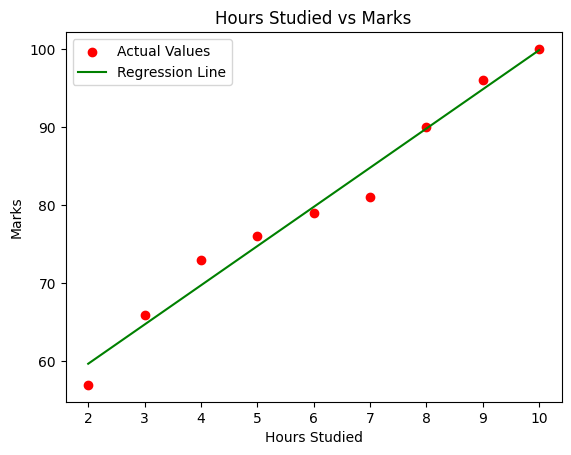

In [ ]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot regression line
plt.plot(X,pred_values,color='green',label='Regression Line')
plt.title('Hours Studied vs Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.legend()
plt.show()


In [ ]:
# R-squared
# after fitting the line we want to know how well the line explains the data - that's where R2 comes in
# regression score function

from sklearn.metrics import r2_score
regressionScore = r2_score(Y,pred_values)
print('Regression Score Function : ',regressionScore)
print(f'Regression Score Function : {int(regressionScore*100)}%')


Regression Score Function :  0.9757431074095347
Regression Score Function : 97%


In [ ]:
# Stage 6 : Final Predictions
hrs = float(input('How Many Hours You Studied In A Day : '))
marks = lin_reg.predict([[hrs]])
# need to put double [[]] because of 1D. if not, it will be an error
print(f'You Can Score {int(marks[0])} Marks')

How Many Hours You Studied In A Day : 6.5
You Can Score 82 Marks


In [ ]:
hrs = float(input('How Many Hours You Studied In A Day : '))
if 1<= hrs <=10:  # 1-10 is based on the hours_studied in the record
  marks = lin_reg.predict([[hrs]])
  print(f'You Can Score {int(marks[0])} Marks')
else:
  print('Please Enter The Hours Between 1 Till 10')

How Many Hours You Studied In A Day : 6.5
You Can Score 82 Marks
